# <font color=blue>  Let's Go Back to Our Question</font>
### Question: Assume that we have a set of data $\{(x_i, y_i)\}_{i=0}^{n-1}$, where $x_i$'s and $y_i$'s are values or vectors of values. 

### $\hspace{2cm}$ Can we find a function $f_W(X)$ that <font color=red>best fits</font> this set of data, where $W$ is a parameter that specifies $f$?


### Strategy to "<font color=red>train</font>" $f_W$:
- Given dataset $\{(x_i, y_i)\}$, we will find $W$ such that 

### \begin{eqnarray}f_W(x_i)\approx y_i\text{ for all $i$'s.}\label{eqn}\end{eqnarray}

-  To this end, 
- [First Step] We choose an appropriate <font color=red>cost function</font> $COST(W)$ such that it has minima at $W'$ and $W'$ satisfies the above equation. 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <font color=blue>Example of cost function: $COST(W):=\sum_{i}|f_W(x_i)-y_i|^2$</font>

- [Second Step] We train NN with parameters $W$, where the training procedure is to find $W'$ iteratively by using the (variant of) <font color=red>gradient descent method (GD)</font>.

    1. <font color=blue>Choose an initial point of $W$. Say, $w$.</font>
    2. <font color=blue>Iteratively update $w$ by applying GD: $w\leftarrow w-lr\cdot\nabla COST$</font>

***

### Some contents collected from our reference [Ng]
# <font color=blue> Logistic Regression </font>
- Given an input $\mathbf{x}\in\mathbb{R}^n $, we want to compute a probability of the prediction $\hat y = \Pr(y=1|\mathbf{x})$, so that $0\leq \hat y\leq 1$.

- Using parameters $\mathbf{w}\in\mathbb{R}^n$ and $b\in\mathbb{R}$, consider a function with $\mathbf{w}=(w_1,\ldots,w_n)$ and $b$ that outputs $\hat y = \sigma(\mathbf{w}^\top \mathbf{x}+b)$, where $\sigma(z)=\frac{1}{1+e^{-z}}$ is the sigmoid function.

$\hspace{2cm}$ - If $z$ is a large positive number, $\sigma(z)\approx\frac{1}{1+0}=1$.

$\hspace{2cm}$ - If $z$ is a large negative number, $\sigma(z)\approx\frac{1}{1+\text{Big Number}}\approx 0$.

- Note that the derivative of the sigmoid function $\frac{d\sigma}{dz}=\sigma(z)(1-\sigma(z))$.


- WLOG, we can remove the variable $b$ by setting parameters $\mathbf{w}'=(\mathbf{w},b)$ and inputs $\mathbf{x}'=(\mathbf{x},1)$ since $\hat y$ can be written as $\sigma(\mathbf{w}'^\top \mathbf{x}')$.

# <font color=blue> Cost Function for Logistic Regression </font>
- Given dataset $\{(\mathbf{x}^{(i)},y^{(i)})\}_{i=0}^{m-1}$, we want to find parameters satisfying $\hat y^{(i)}\approx y^{(i)}$, where $\hat y^{(i)}=\sigma(\mathbf{w}^\top \mathbf{x}^{(i)}+b)$.
- Loss/Error function is defined to minimize a gap between predictions $\hat y^{(i)}$ and observed values of the variable being predicted $y^{(i)}$.

$\hspace{2cm}$ - [MSE] $L(\hat y, y)= \frac{1}{2}(\hat y - y)^2$ 

$\hspace{2cm}$ - [Cross-Entropy Loss] $L(\hat y, y)= -\big(\ y\log\hat y +(1-y)\log(1-\hat y)\ \big)$ 

$\hspace{3cm}$ - If the sample $y=1$, then $L(\hat y, y)=-\log\hat y$, so that it decreases iff $\hat y$ increases.

$\hspace{3cm}$ - If the sample $y=0$, then $L(\hat y, y)=-\log(1-\hat y)$, so that it decreases iff $\hat y$ decreases.

- Cost function is defined as $E(\mathbf{w},b)=\frac{1}{m}\sum_{i=0}^{m-1}L(\hat y^{(i)}, y^{(i)})$. 
- For the logistic regression, the second loss function is usually used.

# <font color=blue> Review Gradient Descent (GD) Method </font>
The parameter $w$ is iteratively updated by the following update rule.

$$w_i\leftarrow w_i - \lambda\frac{\partial E}{\partial w_i}\ \text{for each} \ i=1,\ldots,n\ \ \ \ \ \text{and }\ \ b\leftarrow b - \lambda\frac{\partial E}{\partial b},$$
where $\lambda$ is a hyperparameter called *learning rate*.

# <font color=blue> Minimize Cost Function by using Gradient Descent Method </font>
### One sample case
The computation graph for the combination of the loss function and the logistic regression is as follows.
$$\mathbf{x},\mathbf{w},b\stackrel{\mathbf{w}^\top\mathbf{x}+b}{\longrightarrow} \fbox{$z$}\stackrel{\sigma(z)}{\longrightarrow}\fbox{$\hat y$}\stackrel{L(\hat y,y)}{\longrightarrow}L$$
Given a data $(\mathbf{x},y)$, our goal is to find appropriate parameters $\mathbf{w}$ and $b$ that miniize $L(\hat y,y)$. That is, we fix $\mathbf{x}$ and $y$ as constant and consider only $\mathbf{w}$ and $b$ as variables.

By applying the reverse mode AD (that is, the chain rule), we can compute $\frac{\partial L}{\partial w_i}$ for each $i$ and $\frac{\partial L}{\partial b}$.

In the process of the reverse mode AD, 
- [Step1] Compute $\frac{\partial L}{\partial \hat y}$
- [Step2] Compute $\frac{\partial \hat y}{\partial z}$ and then $\frac{\partial L}{\partial z}=\frac{\partial L}{\partial \hat y}\cdot\frac{\partial \hat y}{\partial z}$.
- [Step3] Compute $\frac{\partial z}{\partial w_i}$ and then $\frac{\partial L}{\partial w_i}=\frac{\partial L}{\partial z}\cdot\frac{\partial z}{\partial w_i}$.

We can simplify this process because

$\hspace{2cm}$ $\frac{\partial L}{\partial \hat y}= - \frac{y}{\hat y}+\frac{1-y}{1-\hat y}$,

$\hspace{2cm}$ $\frac{\partial L}{\partial z}=\frac{\partial L}{\partial \hat y}\cdot\frac{\partial \hat y}{\partial z}=\Big(- \frac{y}{\hat y}+\frac{1-y}{1-\hat y}\Big)\cdot\Big(\hat y\cdot (1-\hat y)\Big)=\hat y - y$,

$\hspace{0.5cm}$ and thus $\frac{\partial L}{\partial w_i}=\frac{\partial L}{\partial z}\cdot\frac{\partial z}{\partial w_i}=(\hat y-y)\cdot x_i$ and $\frac{\partial L}{\partial b}=\frac{\partial L}{\partial z}\cdot\frac{\partial z}{\partial b}=(\hat y-y)\cdot 1$.

- Using the result, we update parameters by the above update rule.

### Multiple samples case
$$\{\mathbf{x}^{(j)}\}, \mathbf{w},b\stackrel{\mathbf{w}^\top\mathbf{x}^{(j)}+b}{\longrightarrow} \fbox{$\{z^{(j)}\}$}\stackrel{\sigma(z^{(j)})}{\longrightarrow}\fbox{$\{\hat y^{(j)}\}$}\stackrel{\frac{1}{m}\sum_{j=0}^{m-1}L(\hat y^{(j)}, y^{(j)})}{\longrightarrow} E$$

- Given a dataset $\{(\mathbf{x}^{(i)},y^{(i)})\}_{i=0}^{m-1}$, our goal is to find appropriate parameters $\mathbf{w}$ and $b$ that miniize $E$. 

- For each pair $(\mathbf{x}^{(j)},y^{(j)})$, we can compute 
$$dw_i^{(j)}:=\frac{\partial L}{\partial w_i}=\frac{\partial L}{\partial z}\cdot\frac{\partial z}{\partial w_i}=(\hat y^{(j)}-y^{(j)})\cdot x_i^{(j)}$$ and $$db^{(j)}:=\frac{\partial L}{\partial b}=\frac{\partial L}{\partial z}\cdot\frac{\partial z}{\partial b}=(\hat y^{(j)}-y^{(j)})\cdot 1$$

$\hspace{0.5cm}$ Then, we have $\frac{\partial E}{\partial w_i}=\frac{1}{m}\sum_{j=0}^{m-1}dw_i^{(j)}$ and $\frac{\partial E}{\partial b}=\frac{1}{m}\sum_{j=0}^{m-1}db^{(j)}$ since $E=\frac{1}{m}\sum_{j=0}^{m-1}L(\hat y^{(j)}, y^{(j)})$.

$\hspace{0.5cm}$ Finally, we update parameters $\mathbf{w}$ and $b$ by the update rule.

# <font color=blue> Minibatch Stochastic Gradient Descent (SGD) Method </font>
- Given a dataset $\{(\mathbf{x}^{(i)},y^{(i)})\}_{i=0}^{m-1}$, the parameter $w$ is repeatedly updated by the following update rule.

$\hspace{1cm}$ First, uniformly choose a subset $X\subset\{(\mathbf{x}^{(i)},y^{(i)})\}_{i=0}^{m-1}$ of size $m'$ (minibatch size).
$\hspace{2cm}$ (SGD is the case that $|X|=1$)

$\hspace{1cm}$ Second, for the set $X$, apply the update rule for GD.
***
***

# <font color=blue>Dataset </font>

- https://pytorch.org/vision/stable/datasets.html
- Torchvision provides many built-in datasets in the torchvision.datasets module, as well as utility classes for building your own datasets.

## <font color=blue>MNIST </font>
- Black-and-white $0\sim9$ numbers images of $28\times28$ pixels.

train dataset size: 60000
test dataset size: 10000
tensor(0)


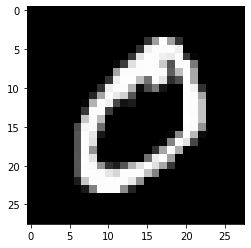

tensor(4)


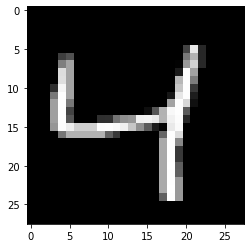

tensor(1)


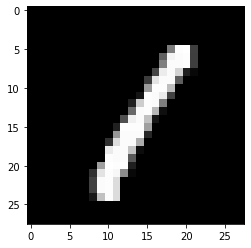

tensor(9)


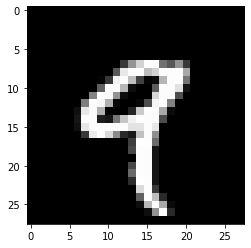

tensor(2)


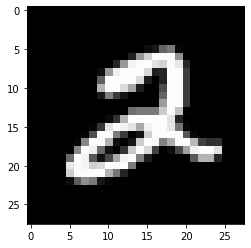

tensor(1)


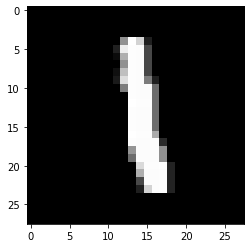

tensor(3)


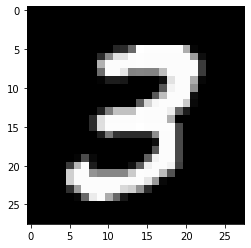

tensor(1)


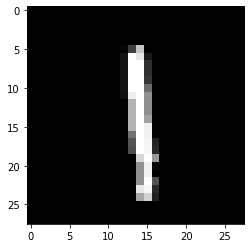

tensor(4)


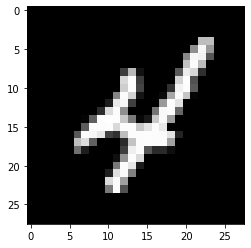

In [1]:
from torchvision import datasets
import torchvision.transforms as transforms

### dataset for training parameters
train_dataset = datasets.MNIST(root='./mnist_data/', train=True, transform=transforms.ToTensor(), download=True)
### dataset for testing the accuracy of the trained parameters
test_dataset = datasets.MNIST(root='./mnist_data/', train=False, transform=transforms.ToTensor())

print('train dataset size:',len(train_dataset.data))

print('test dataset size:',len(test_dataset.data))

import matplotlib.pyplot as plt

for i in range(1,10):
    image = train_dataset.data[i]
    print(train_dataset.targets[i])
    plt.imshow(image, cmap='gray')  
    plt.show()

### normalizing dataset
# train_dataset.data = (train_dataset.data/255-0.1307)/0.3081
# test_dataset.data = (test_dataset.data/255-0.1307)/0.3081
# print(train_dataset.data[0])

In [2]:
train_dataset.data[1]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

### MNIST is a dataset of 10 images
### To apply the logistic regression method, we make a subset of MNIST consisting of only two number images.

tensor(0)


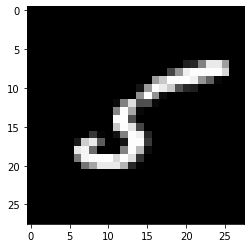

tensor(0)


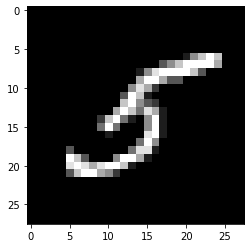

tensor(0)


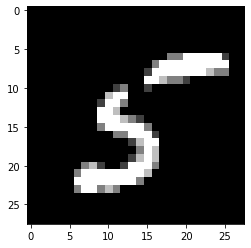

tensor(0)


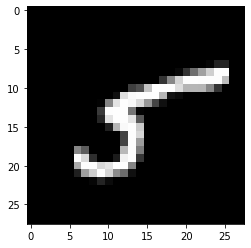

tensor(0)


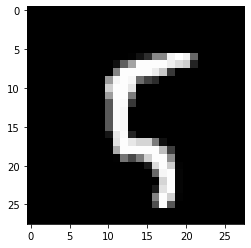

tensor(0)


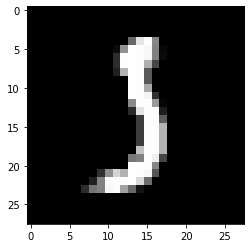

tensor(0)


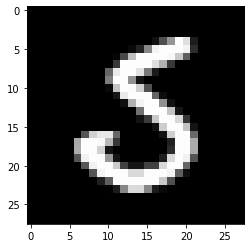

tensor(0)


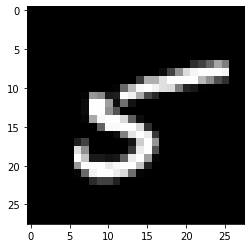

tensor(0)


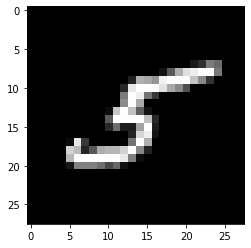

tensor(1)


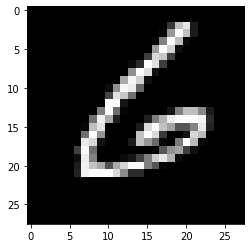

tensor(1)


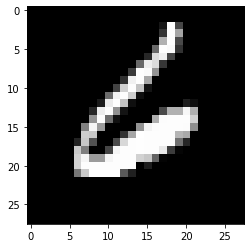

tensor(1)


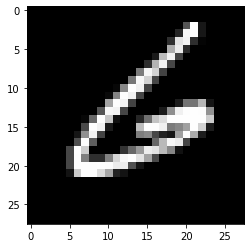

tensor(1)


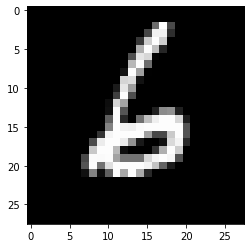

tensor(1)


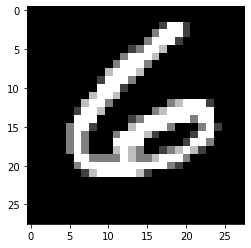

tensor(1)


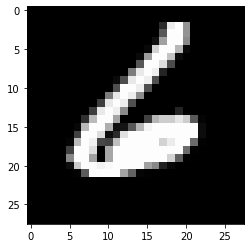

tensor(1)


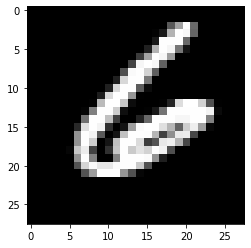

tensor(1)


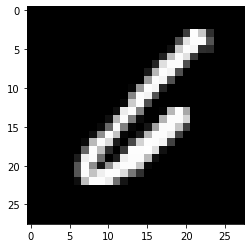

tensor(1)


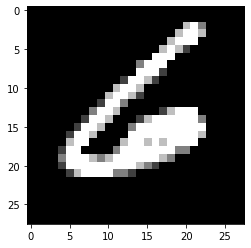

In [3]:
import torch
import matplotlib.pyplot as plt

'''
Choose two numbers and prepare datasets with two numbers.
'''
nb1 = 5
nb2 = 6

train_dataset.data = torch.cat([train_dataset.data[(train_dataset.targets == nb1)],train_dataset.data[(train_dataset.targets == nb2)]],dim=0)
train_dataset.targets = torch.cat([train_dataset.targets[(train_dataset.targets == nb1)],train_dataset.targets[(train_dataset.targets == nb2)]],dim=0)

train_dataset.targets[(train_dataset.targets == nb1)] = 0
train_dataset.targets[(train_dataset.targets == nb2)] = 1


for i in range(1,10):
    image = train_dataset.data[i]
    print(train_dataset.targets[i])
    plt.imshow(image, cmap='gray')  
    plt.show()
    
for i in range(1,10):    
    image = train_dataset.data[-i]
    print(train_dataset.targets[-i])    
    plt.imshow(image, cmap='gray')
    plt.show()

In [4]:
'''
Do the same thing for the test dataset
'''

test_dataset.data = torch.cat([test_dataset.data[(test_dataset.targets == nb1)],test_dataset.data[(test_dataset.targets == nb2)]],dim=0)
test_dataset.targets = torch.cat([test_dataset.targets[(test_dataset.targets == nb1)],test_dataset.targets[(test_dataset.targets == nb2)]],dim=0)

test_dataset.targets[(test_dataset.targets == nb1)] = 0
test_dataset.targets[(test_dataset.targets == nb2)] = 1

0/False means 5 and 1/True means 6
tensor(0)


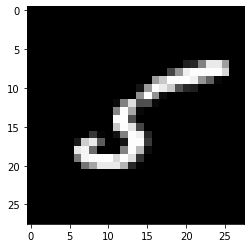

tensor(0)


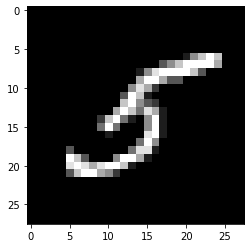

tensor(0)


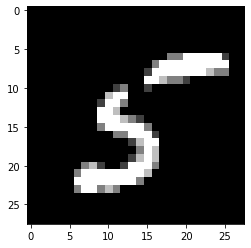

tensor(1)


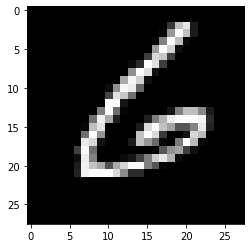

tensor(1)


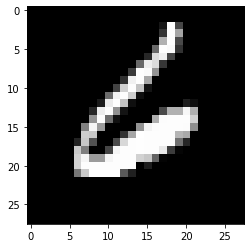

tensor(1)


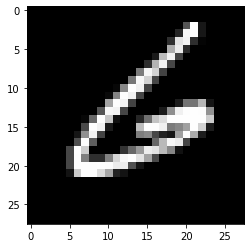

In [5]:
import matplotlib.pyplot as plt

print('0/False means {} and 1/True means {}'.format(nb1,nb2))

for i in range(1,4):
    image = train_dataset.data[i]
    print(train_dataset.targets[i])
    plt.imshow(image, cmap='gray')
    plt.show()
    
for i in range(1,4):
    image = train_dataset.data[-i]
    print(train_dataset.targets[-i])
    plt.imshow(image, cmap='gray')
    plt.show()    
    


In [6]:
print(train_dataset.data[0].shape )

torch.Size([28, 28])


- Prepare parameters for logistic regression